#### Customer churn prediction
#### Krunal Dave
#### Date: 07/06/2024
#### (2)

In [26]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib as mlt


In [27]:
# read the data
df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

Data Preprocessing

In [28]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [29]:
# Here the feature area code has letters initially and has the digit at last position,
# extracting the area code from that by splitting ths column by _ and adding them to the original data frame

# train data
df["area_code_new"]=df["area_code"].str.split("_").str[-1]

#Data for testing
df2["area_code_new"]=df2["area_code"].str.split("_").str[-1]

In [30]:
# Handling the non numerical columns
col=["international_plan","voice_mail_plan","churn"]
col2=["international_plan","voice_mail_plan"]
df_non_num=pd.get_dummies(df,columns=col)
df_non_num = df_non_num.rename(columns={'churn_yes': 'churn'})

df2_non_num=pd.get_dummies(df2,columns=col2)

In [31]:
df_non_num.head()

,state,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_new,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,churn_no,churn
0,OH,107,area_code_415,26,161.6,123,27.47,195.5,103,16.62,...,3,3.70,1,415,1,0,0,1,1,0
1,NJ,137,area_code_415,0,243.4,114,41.38,121.2,110,10.30,...,5,3.29,0,415,1,0,1,0,1,0
2,OH,84,area_code_408,0,299.4,71,50.90,61.9,88,5.26,...,7,1.78,2,408,0,1,1,0,1,0
3,OK,75,area_code_415,0,166.7,113,28.34,148.3,122,12.61,...,3,2.73,3,415,0,1,1,0,1,0
4,MA,121,area_code_510,24,218.2,88,37.09,348.5,108,29.62,...,7,2.03,3,510,1,0,0,1,1,0


In [32]:
# the data containes non numerical and unnecessary column named state,
# also now the area code has been obtained in the saperate column "area_code_new"
# dropping both "state" and  "area_code" columns

df_non_num=df_non_num.drop(["area_code","state","churn_no"],axis=1)

df2_non_num=df2_non_num.drop(["area_code","state"],axis=1)

In [33]:
df_non_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   number_vmail_messages          4250 non-null   int64  
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   int64  
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   i

In [34]:
df_non_num.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_new,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,churn
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,13.7,3,3.70,1,415,1,0,0,1,0
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,12.2,5,3.29,0,415,1,0,1,0,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,6.6,7,1.78,2,408,0,1,1,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,10.1,3,2.73,3,415,0,1,1,0,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,7.5,7,2.03,3,510,1,0,0,1,0


In [35]:
df_non_num.isnull().sum()

account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
area_code_new                    0
international_plan_no            0
international_plan_yes           0
voice_mail_plan_no               0
voice_mail_plan_yes              0
churn                            0
dtype: int64

Until now. we have handled all the categorical variables.
from the above function, it is clear that there are no missing values in the data.


C:\Users\Krunal dave\AppData\Local\Temp\ipykernel_23044\1737419642.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df_non_num,2).corr(),annot=True, annot_kws={"fontsize": 6},cmap="coolwarm")


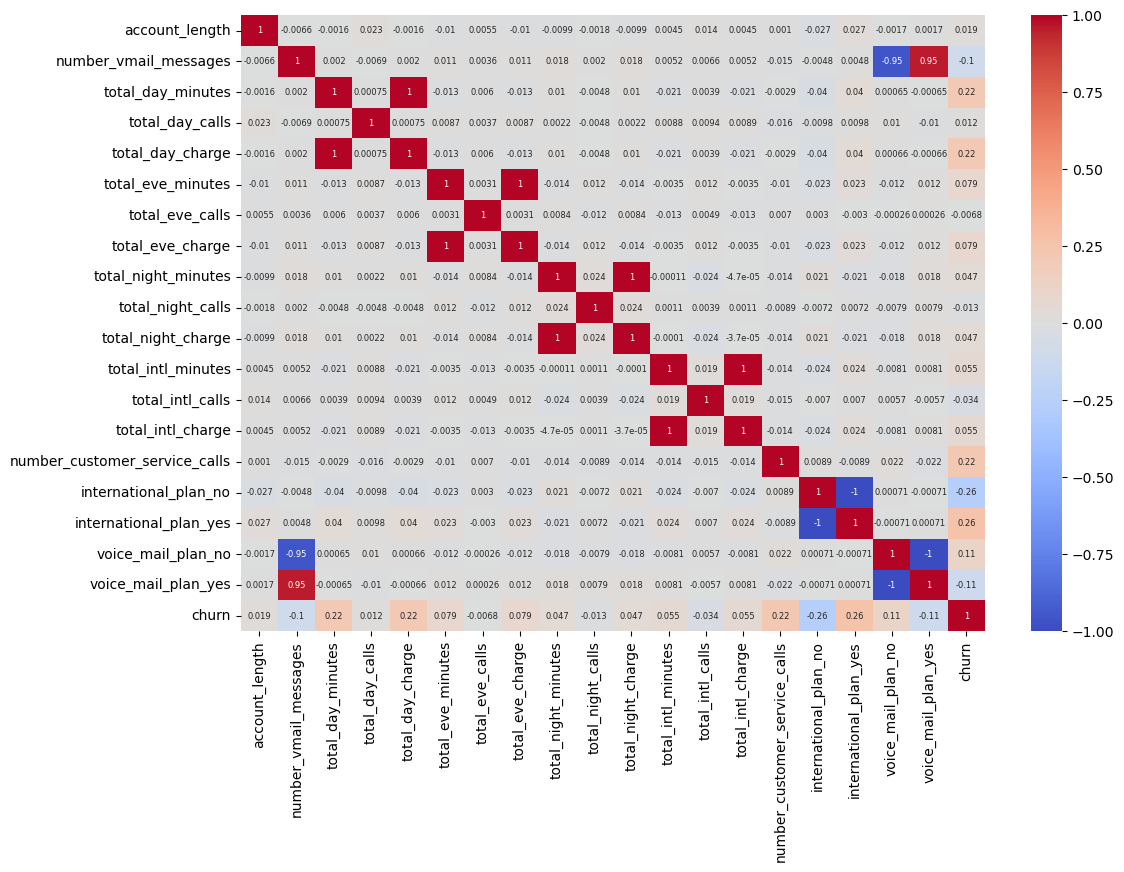

In [45]:
# with the help of corelation function, checking dependencies
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(round(df_non_num,2).corr(),annot=True, annot_kws={"fontsize": 6},cmap="coolwarm")
#plt.savefig("heatmap.png")


As it can be observed in the above image, each feature has slight or moderate effect on the target variable,any of positive or negative. 
for now, we will keep all the variables